# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE MEAN-REVERSION (CIR) TEMPERATURE MODEL 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tt=pd.read_excel('my_research_temp_data.xlsx')
data_in = np.array(tt['Annual Mean'])
data = data_in[-62:]
yrs = np.array(tt['Category'])
years = yrs[-62:]

## DESCRIPTIVE STATISTICS FOR THE ACTUAL TEMPERATURE DATA

In [3]:
# Convert the NumPy array to a pandas Series
data_series = pd.Series(data)

# Compute descriptive statistics
descriptive_stats = data_series.describe()

print(descriptive_stats)

count    62.000000
mean     27.426290
std       0.418758
min      26.480000
25%      27.177500
50%      27.420000
75%      27.740000
max      28.300000
dtype: float64


In [4]:
# Step 1: Compute Y and X
def compute_Y_X(data, delta_t):
    n = len(data)
    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        Y[i] = (data[i + 1] - data[i]) / np.sqrt(np.abs(data[i]))
        X[i, 0] = (delta_t / np.sqrt(np.abs(data[i])))
        X[i, 1] = np.sqrt(np.abs(data[i])) * delta_t
    
    return Y, X

# Step 2: Compute beta_hat
def compute_C_hat(Y, X):
    X_transpose_X_inv = np.linalg.inv(X.T @ X)
    C_hat = X_transpose_X_inv @ X.T @ Y
    alpha = -C_hat[1]
    Tbar = C_hat[0] / alpha
    return C_hat, alpha, Tbar

# Step 3: Compute Y and X
delta_t = 1  # Time Step
Y, X = compute_Y_X(data, delta_t)

# Step 4: Compute beta_hat
C_hat, alpha, Tbar = compute_C_hat(Y, X)

# Step 5: Compute beta
def compute_beta(data, delta_t):
    Y, X = compute_Y_X(data, delta_t)
    C_hat, alpha, Tbar = compute_C_hat(Y, X)
    Y_pred = X.dot(C_hat)
    residuals = Y - Y_pred
    
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    beta_hat = np.sqrt(np.var(residuals) / delta_t)
    
    return beta_hat

# Compute predicted changes 
Y_pred = X.dot(C_hat)

# Compute the predicted temperature values in original scale
predicted_temp = np.cumsum(Y_pred) + data[0]


# Example parameters
beta_hat = compute_beta(data, delta_t)
print(f'My Estimated Params are: [alpha: {alpha}, Tbar: {Tbar}, beta_hat: {beta_hat}]')

Sum of Squared Errors: 0.18697918024211393
Total Sum of Squares: 0.21933732957715465
MSE: 0.3065%
My Estimated Params are: [alpha: 0.2886376653569112, Tbar: 27.463908417676507, beta_hat: 0.05536454156752402]


## PLOTTING TIME SERIES GRAPH FOR THE ACTUAL TEMPERATURE DATA FOR VISUALISATION


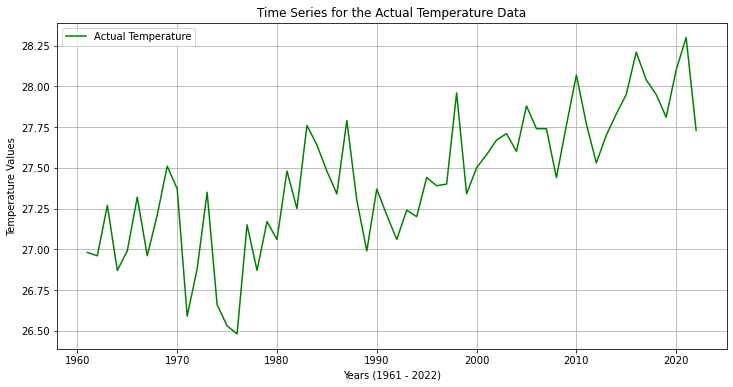

In [5]:
assert len(years) == len(data)
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Temperature', color='green')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Temperature Data')
plt.savefig('TIME_SERIES_TEMPERATURE.png', facecolor='w')
#plt.show()

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL TEMPERATURE DATA 

Skewness = -0.18407126215971129


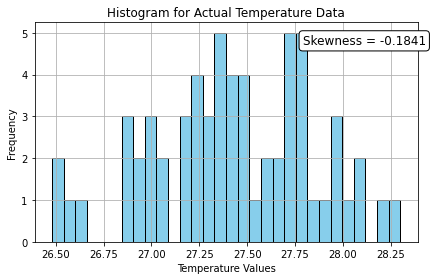

In [6]:
# plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, edgecolor='black',color='skyblue')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Temperature Data')
plt.grid(True)
plt.tight_layout()

skewness = stats.skew(data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

plt.savefig('CIR_HISTOGRAM_ACTUAL_TEMPERATURE.png', facecolor='w')
#plt.show()

## PLOTTING THE PREDICTED VALUES FOR VISUALISATION


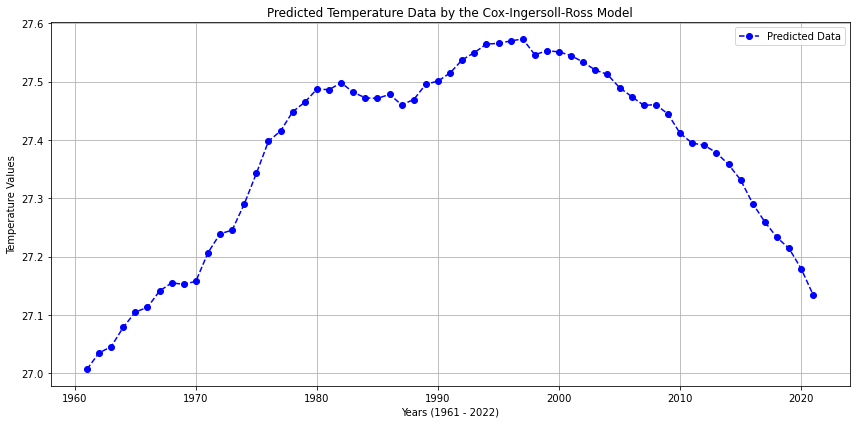

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(years[:-1], predicted_temp, label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature Values')
plt.legend()
plt.grid(True)
plt.title('Predicted Temperature Data by the Cox-Ingersoll-Ross Model')
plt.tight_layout()

#plt.savefig('CIR_PREDICTED_TEMPERATURE.png', facecolor='w')
plt.show()

## HISTOGRAM FOR VISUALISATION OF THE PREDICTED DATA 

Skewness = -0.6924114541835682


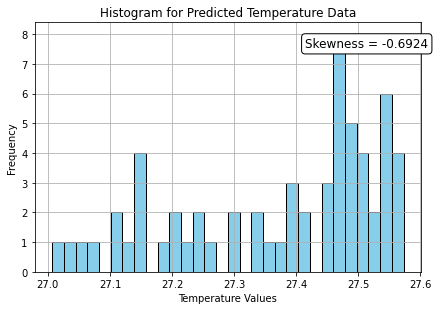

In [8]:
plt.hist(predicted_temp
         , bins=30, edgecolor='black', color='skyblue')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for Predicted Temperature Data')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')

skewness = stats.skew(predicted_temp)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_PREDICTED_TEMPERATURE.png', facecolor='w')
plt.show()

## DESCRIPTIVE STATISTICS FOR PREDICTED VALUES

In [9]:
data_series = pd.Series(predicted_temp)
descriptive_stats = data_series.describe()
print(descriptive_stats)

count    61.000000
mean     27.374991
std       0.164494
min      27.006890
25%      27.239098
50%      27.448307
75%      27.497935
max      27.573079
dtype: float64


## THE MONTE CARLO SIMULATION OF PATHS 

In [10]:
def cir(T_0, alpha, Tbar, beta, T, N, M):
    dt = T / N
    sqrt_dt = np.sqrt(dt)
    temp = np.zeros((M, N + 1))
    temp[:, 0] = T_0
    
    for i in range(N):
        dW_T = np.random.normal(0, 1, size=M)
        temp[:, i + 1] = np.maximum(0, temp[:, i]) + alpha * (Tbar - np.maximum(0, temp[:, i])) * dt + beta * np.sqrt(np.maximum(0, temp[:, i]))*sqrt_dt * dW_T

    return temp

# Parameters
M = 1000 # Number of paths for MC
T = 61 # Total time (61 years)
N = 61 # Number of steps
T_0 = tt['Annual Mean'].iloc[0] # Initial temperature
alpha = 0.2886376653569112 
Tbar = 27.463908417676507 
beta_hat = 0.05536454156752402 

# Time vector
t = np.linspace(0, T, N + 1)

# Simulate paths
temp = cir(T_0, alpha, Tbar, beta_hat, T, N, M)

# Compute mean path
mean_path_simul = np.mean(temp, axis=0)

## HISTOGRAM FOR ONE SIMULATED TEMPERATURE PATH 

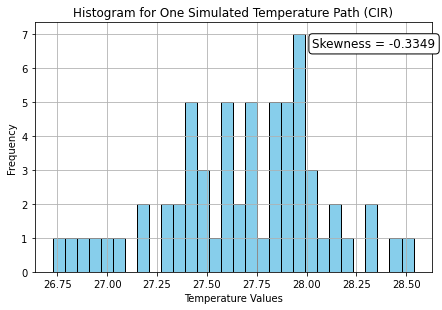

In [11]:
#plt.figure(figsize=(10, 6))
plt.hist(temp[0,:], bins=30, edgecolor='black', color='skyblue')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for One Simulated Temperature Path (CIR)')
plt.xlabel('Temperature Values')
plt.ylabel('Frequency')

skewness = stats.skew(temp[0,:])
#plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ONE_SIMULATED_TEMPERATURE.png', facecolor='w')
plt.show()

## DESCRIPTIVE STATISTICS FOR ALL SIMULATED PATHS COMBINED

In [12]:
combined_data = temp.flatten()
combined_data_series = pd.Series(combined_data)
combined_stats = combined_data_series.describe()

print(combined_stats)

count    62000.000000
mean        27.437393
std          0.415149
min         25.624041
25%         27.144262
50%         27.430903
75%         27.716315
max         29.062143
dtype: float64


## PLOTTING THE GRAPH OF THOUSAND SIMULATED PATH FOR VISUALISATION


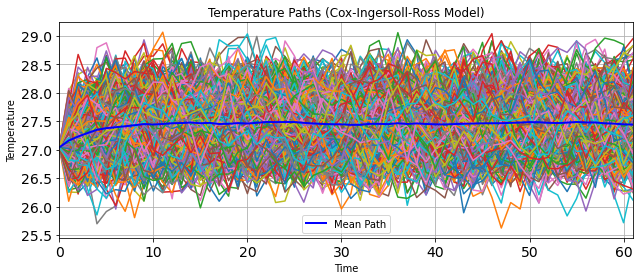

In [13]:
plt.figure(figsize=(9, 4))
for i in range(M):
    plt.plot(t, temp[i])  
plt.plot(t, mean_path_simul, color='blue', linewidth=2, label='Mean Path')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Paths (Cox-Ingersoll-Ross Model)')
plt.xlim([0, T])  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid(True)
#plt.savefig('CIR_THOUSAND_PATHS_TEMPERATURE.png', facecolor='w')
#plt.show()


## PLOTTING THE MEAN OF SIMULATED PATHS FOR VISUALISATION

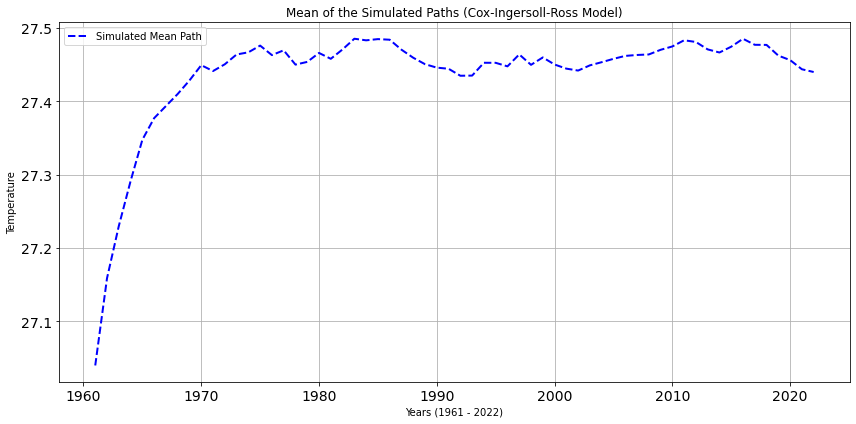

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(years, mean_path_simul, color='blue', linewidth=2, label='Simulated Mean Path', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Temperature')
plt.title('Mean of the Simulated Paths (Cox-Ingersoll-Ross Model)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.legend()
#plt.savefig('CIR_MEAN_SIMUL_TEMPERATURE.png', facecolor='w')
plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE MEAN-REVERSION (CIR) PRECIPITATION MODEL

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12)

In [16]:
#Precipitation data
rr=pd.read_csv('observed-annual-precipitation-of-ghana-for-1901-2022.csv')
data_inn = np.array(rr['Annual Mean'])
data_precip = data_inn[-62:]
yrs = np.array(rr['Category'])
years = yrs[-62:]

## THE NORMALIZATION OF RAINFALL DATA

In [17]:
# Log transformation
def log_transform(data_precip):
    # Adding 1 to avoid log(0) if there are zero values
    normalized_data = np.log(data_precip + 1)
    
    return normalized_data

normalized_data = log_transform(data_precip)

## DESCRIPTIVE STATISTICS FOR THE ACTUAL PRECIPITATION DATA

In [18]:
# Convert the log-transformed NumPy array to a pandas Series
log_series = pd.Series(normalized_data, name='Annual Mean Log Transformed')

# Compute descriptive statistics
descriptive_stats = log_series.describe()

print(descriptive_stats)

count    62.000000
mean      7.102308
std       0.113705
min       6.746048
25%       7.049116
50%       7.103758
75%       7.141720
max       7.482620
Name: Annual Mean Log Transformed, dtype: float64


In [19]:
# Step 1: Compute Y and X
def compute_Y_X(normalized_data, delta_t):
    n = len(normalized_data)
    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        Y[i] = (normalized_data[i + 1] - normalized_data[i]) / np.sqrt(np.abs(normalized_data[i]))
        X[i, 0] = (delta_t / np.sqrt(np.abs(normalized_data[i])))
        X[i, 1] = np.sqrt(np.abs(normalized_data[i])) * delta_t
    
    return Y, X

# Step 2: Compute beta_hat
def compute_C_hat(Y, X):
    X_transpose_X_inv = np.linalg.inv(X.T @ X)
    C_hat = X_transpose_X_inv @ X.T @ Y
    gamma = -C_hat[1]
    Rbar = C_hat[0] / gamma
    return C_hat, gamma, Rbar

# Step 3: Compute Y and X
delta_t = 1  # Time Step
Y, X = compute_Y_X(normalized_data, delta_t)

# Step 4: Compute delta_hat
C_hat, gamma, Rbar = compute_C_hat(Y, X)

# Step 5: Compute delta
def compute_delta(normalized_data, delta_t):
    Y, X = compute_Y_X(normalized_data, delta_t)
    C_hat, gamma, Rbar = compute_C_hat(Y, X)
    Y_pred = X.dot(C_hat)
    residuals = Y - Y_pred
    
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    delta_hat = np.sqrt(np.var(residuals) / delta_t)
    
    return delta_hat

Y_pred = X.dot(C_hat)

# The predicted temperature values in original scale
predicted_precip = np.cumsum(Y_pred) + normalized_data[0]


# Example parameters
delta_hat = compute_delta(normalized_data, delta_t)
print(f'My Estimated Params are: [gamma: {gamma}, Rbar: {Rbar}, delta_hat: {delta_hat}]')

Sum of Squared Errors: 0.10944005288080107
Total Sum of Squares: 0.20442445872002812
MSE: 0.1794%
My Estimated Params are: [gamma: 0.9267227175571794, Rbar: 7.103812260785402, delta_hat: 0.042356808514400435]


## PLOTTING TIME SERIES GRAPH FOR THE ACTUAL PRECIPITATION (RAINFALL) DATA FOR VISUALISATION


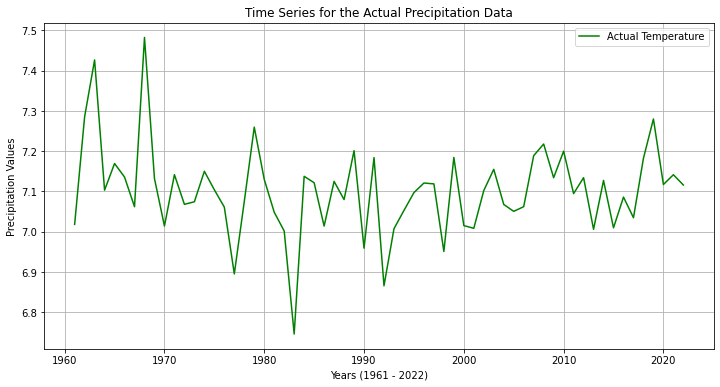

In [20]:
assert len(years) == len(normalized_data)
plt.figure(figsize=(12, 6))
plt.plot(years, normalized_data, label='Actual Temperature', color='green')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Precipitation Data')
plt.savefig('TIME_SERIES_PRECIPITATION.png', facecolor='w')
#plt.show()

## BOX PLOT FOR VISUALISATION OF THE ACTUAL DATA 

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL PRECIPITATION DATA 

Skewness = 0.33404307970510316


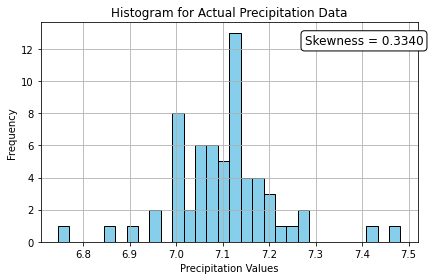

In [21]:
# plt.figure(figsize=(12, 6))
plt.hist(normalized_data, bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Precipitation Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Precipitation Data')
plt.grid(True)
plt.tight_layout()
skewness = stats.skew(normalized_data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.savefig('CIR_HISTOGRAM_ACTUAL_PRECIPITATION.png', facecolor='w')
#plt.show()

## PLOTTING THE ACTUAL AGAINST PREDICTED PRECIPITATION VALUES FOR VISUALISATION



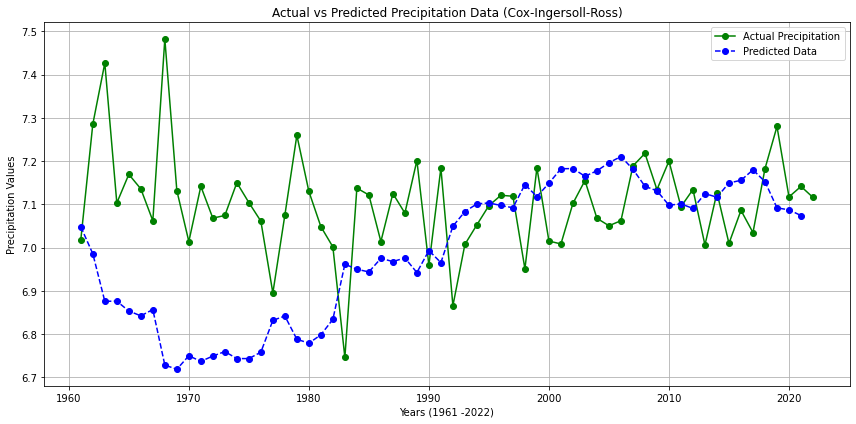

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(years, normalized_data, label='Actual Precipitation', color='green', marker='o')
plt.plot(years[:-1], predicted_precip, label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 -2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Actual vs Predicted Precipitation Data (Cox-Ingersoll-Ross)')
plt.tight_layout()
#plt.savefig('CIR_ACTUAL_VS_PREDICTED_PRECIPITATION.png', facecolor='w')
plt.show()

## PLOTTING THE PREDICTED VALUES FOR VISUALISATION


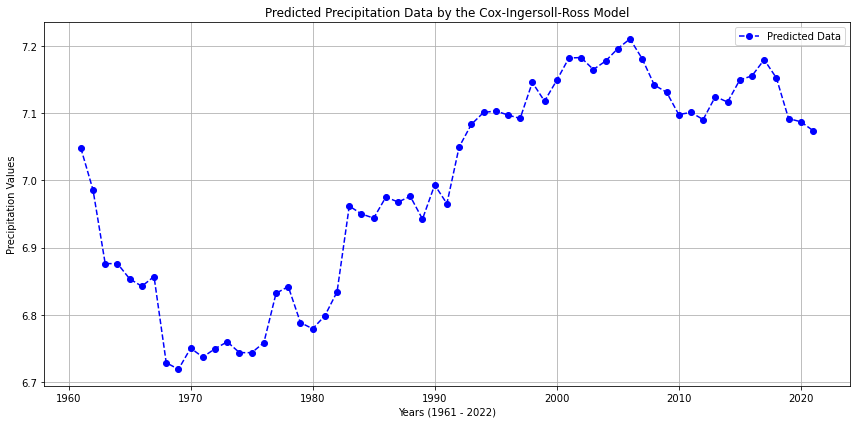

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(years[:-1], predicted_precip, label='Predicted Data', color='blue', marker='o', linestyle='--')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Precipitation Values')
plt.legend()
plt.grid(True)
plt.title('Predicted Precipitation Data by the Cox-Ingersoll-Ross Model')
plt.tight_layout()
#plt.savefig('CIR_PREDICTED_PRECIPITATION.png', facecolor='w')
plt.show()


## DESCRIPTIVE STATISTICS FOR PREDICTED VALUES

In [24]:
predicted_data = X.dot(C_hat)
data_series = pd.Series(predicted_data)
descriptive_stats = data_series.describe()
print(descriptive_stats)

count    61.000000
mean      0.000917
std       0.039788
min      -0.128334
25%      -0.013159
50%       0.000190
75%       0.019271
max       0.127650
dtype: float64


## THE MONTE CARLO SIMULATION OF PATHS


In [25]:
def cir(T_0, gamma, Rbar, delta, T, N, M):
    dt = T / N
#     sqrt_dt = np.sqrt(dt)
    precip = np.zeros((M, N + 1))
    precip[:, 0] = R_0
    
    for i in range(N):
        dW_R = np.random.normal(0, dt, size=M)
        precip[:, i + 1] = np.maximum(0, precip[:, i]) + gamma * (Rbar - np.maximum(0, precip[:, i])) * dt + delta * np.sqrt(np.maximum(0, precip[:, i])) * dW_R

    return precip

# Parameters
M = 1000 # Number of paths for MC
T = 61 # Total time (61 years)
N = 61 # Number of steps
R_0 = normalized_data[0]
gamma = 0.9267227175571794 
Rbar = 7.103812260785402 
delta_hat = 0.042356808514400435 

# Time vector
t = np.linspace(0, T, N + 1)

# Simulate paths
precip = cir(R_0, gamma, Rbar, delta_hat, T, N, M)

# Compute mean path
mean_path_simul = np.mean(precip, axis=0)

## HISTOGRAM FOR ONE SIMULATED PRECIPITATION PATH 

Text(0.7, 0.9, 'Skewness = -0.3400')

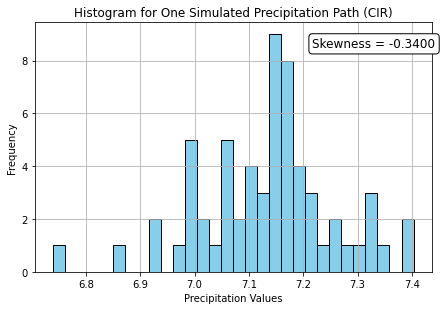

In [26]:
#plt.figure(figsize=(10, 6))
plt.hist(precip[0,:], bins=30, color='skyblue', edgecolor='black')
plt.grid(True)
plt.tight_layout()
plt.title('Histogram for One Simulated Precipitation Path (CIR)')
plt.xlabel('Precipitation Values')
plt.ylabel('Frequency')

skewness = stats.skew(precip[0,:])

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ONE_SIMULATED_PRECIPITATION.png', facecolor='w')
#plt.show()

## DESCRIPTIVE STATISTICS FOR ALL SIMULATED PATHS COMBINED

In [27]:
combined_data = precip.flatten()
combined_data_series = pd.Series(combined_data)
combined_stats = combined_data_series.describe()

print(combined_stats)

count    62000.000000
mean         7.101871
std          0.112432
min          6.633026
25%          7.022131
50%          7.100575
75%          7.178092
max          7.573134
dtype: float64


## PLOTTING THE GRAPH OF THOUSAND SIMULATED PATH FOR VISUALISATION


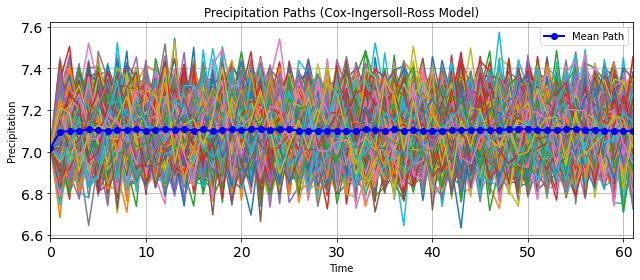

In [28]:
plt.figure(figsize=(9, 4))
for i in range(M):
    plt.plot(t, precip[i])  
plt.plot(t, mean_path_simul, color='blue', linewidth=2, label='Mean Path', marker='o')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation Paths (Cox-Ingersoll-Ross Model)')
plt.xlim([0, T])  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend()
plt.grid(True)
#plt.savefig('CIR_THOUSAND_PATHS_PRECIPITATION.png', facecolor='w')
#plt.show()

## PLOTTING THE RANDOM FLUCTUATIONS OF TEMPERATURE AGAINST PRECIPITATION

Pearson Correlation Coefficient between Temperature and Precipitation fluctuations: 0.0008879362015948016


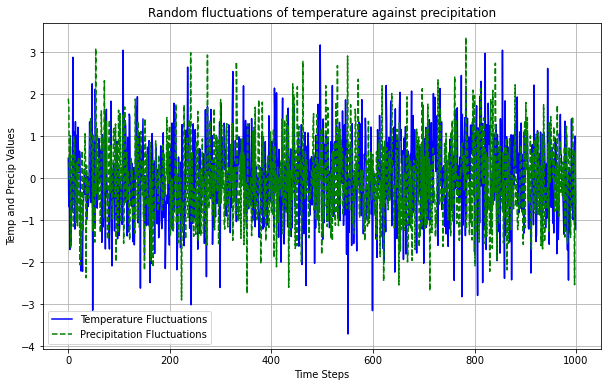

In [30]:
np.random.seed(12)
dW_T = np.random.normal(0, 1, 1000)
dW_R = np.random.normal(0, 1, 1000)

plt.figure(figsize=(10, 6))
plt.plot(dW_T, label='Temperature Fluctuations', color="blue")
plt.plot(dW_R, label='Precipitation Fluctuations',color="green", linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Temp and Precip Values')
plt.legend()
plt.grid(True)
plt.title('Random fluctuations of temperature against precipitation')
plt.savefig('PEARSON_CORRELATION_COEFFICENT.png', facecolor='w')
#plt.show()

# Computing the Pearson Correlation Coefficient
correlation = np.corrcoef(dW_T, dW_R)[0, 1]

print(f'Pearson Correlation Coefficient between Temperature and Precipitation fluctuations: {correlation}')

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE DETERMINISTIC CROP YIELD MODEL WITHOUT PERTURBING THE BASELINE LOSS PARAMETER - CASE 1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
np.random.seed(12)

## ESTIMATION OF THE PARMETERS FOR THE CROP YIELD MODEL

In [32]:
#Crop Yield data
pp=pd.read_csv('crop yield.csv')
data_crop = np.array(pp['Value'])
years = np.array(pp['Year'])

# Log transformation
def log_transform(data_crop):
    # Adding 1 to avoid log(0) if there are zero values
    data = np.log(data_crop + 1)
    return data

data = log_transform(data_crop)

# Step 1: Computation of Y and X
def compute_Y_X(data, delta_t, K):
    n = len(data)
    if n <= 1:
        raise ValueError("Data length must be greater than 1")

    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        Y[i] = data[i + 1] - data[i]
        X[i, 0] = (1 - np.exp(data[i]) / K) * delta_t  # Term for r
        X[i, 1] = delta_t                             # Term for -σ
    
    return Y, X

# Step 2: Computation of C_hat
def compute_C_hat(Y, X, lambda_reg=1e-5):
    n, p = X.shape
    I = np.eye(p)
    X_transpose_X_reg = X.T @ X + lambda_reg * I
    X_transpose_X_inv = np.linalg.inv(X_transpose_X_reg)
    C_hat = X_transpose_X_inv @ X.T @ Y
    return C_hat

# Step 3: Computation of Parameters
def compute_parameters(data, delta_t, lambda_reg=1e-5):
    K = np.max(data)  # The carrying capacity
    Y, X = compute_Y_X(data, delta_t, K)
    C_hat = compute_C_hat(Y, X, lambda_reg)
    
    r = C_hat[0]
    sigma = -C_hat[1]
    sigma = np.abs(sigma)
    
    # Predicted Y
    Y_pred = X @ C_hat
    residuals = Y - Y_pred
    
    # Calculation of Mean Squared Error
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'Mean Squared Error (MSE): {round(mse * 100, 4)}%')

    return r, sigma

delta_t = 1  # Time step

# Compute parameters
r, sigma = compute_parameters(data, delta_t)
print(f'My Estimated Params are: [r: {r}, sigma: {sigma}]')

Sum of Squared Errors: 1.9964909120150236
Total Sum of Squares: 2.0439466974801794
Mean Squared Error (MSE): 3.2729%
My Estimated Params are: [r: 6.558680203841964e-05, sigma: 0.10594802301101927]


## PLOTTING THE ACTUAL OBSERVATIONS AGAINST FITTED YIELD - CASE 1

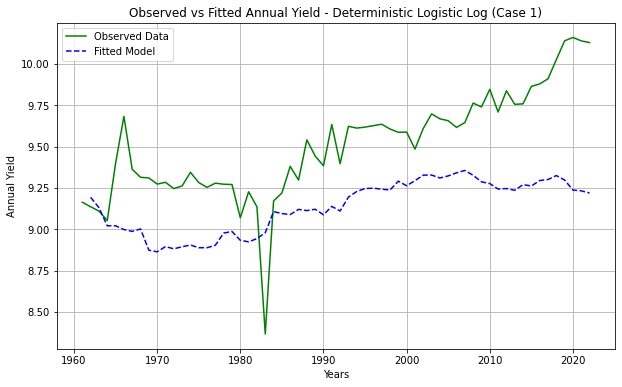

In [33]:
# Predicted temperature values in original scale
Y_pred = X @ C_hat
Predicted_data = np.cumsum(Y_pred) + data[0]

# Plot the observed data and fitted model
plt.figure(figsize=(10, 6))
plt.plot(years, data, label='Observed Data', color='green')
plt.plot(years[1:], Predicted_data, label='Fitted Model', color='blue', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Annual Yield')
plt.title('Observed vs Fitted Annual Yield - Deterministic Logistic Log (Case 1)')
plt.legend()
plt.grid(True)
plt.savefig('ACTUAL_OBSERVATIONS_AGAINST_FITTED YIELD_CASE_1.png', facecolor='w')
#plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE STOCHASTIC CROP YIELD MODEL AFTER INCORPORATING TEMPERATURE - CASE 2

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
np.random.seed(12)

## ESTIMATION OF THE PARMETERS FOR THE CROP YIELD MODEL

In [35]:
#Temperature data
tt=pd.read_excel('my_research_temp_data.xlsx')
data_in = np.array(tt['Annual Mean'])
T=data_temp = data_in[-62:]
years = np.array(tt['Category'])

#Crop Yield data
pp=pd.read_csv('crop yield.csv')
data_crop = np.array(pp['Value'])
years = np.array(pp['Year'])

# Log transformation
def log_transform(data_crop):
    # Adding 1 to avoid log(0) if there are zero values
    data = np.log(data_crop + 1)
    return data
data = log_transform(data_crop)

# Step 1: Computation of Y and X
def compute_Y_X(data, T, delta_t, K):
    n = len(data)
    if n <= 1:
        raise ValueError("Data length must be greater than 1")

    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        sqrt_T_i = np.sqrt(T[i])
        Y[i] = (data[i + 1] - data[i]) / sqrt_T_i
        X[i, 0] = (1 - np.exp(data[i]) / K) * (delta_t / sqrt_T_i)  
        X[i, 1] = (delta_t / sqrt_T_i)                            
    
    return Y, X

# Step 2: Computation of C_hat
def compute_C_hat(Y, X, lambda_reg=1e-5):
    n, p = X.shape
    I = np.eye(p)
    X_transpose_X_reg = X.T @ X + lambda_reg * I
    X_transpose_X_inv = np.linalg.inv(X_transpose_X_reg)
    C_hat = X_transpose_X_inv @ X.T @ Y
    return C_hat

# Step 3: Computation of Parameters
def compute_parameters(data, T, delta_t, K, lambda_reg=1e-5):
    Y, X = compute_Y_X(data, T, delta_t, K)
    C_hat = compute_C_hat(Y, X, lambda_reg)
    
    r = C_hat[0]
    sigma = -C_hat[1]
    sigma = np.abs(sigma)
    
    # Predicted Model Y
    Y_predd = X @ C_hat
    residuals = Y - Y_predd
    
    # Calculation of Mean Squared Error (MSE)
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    # Estimate sigma_T from residuals
    sigma_T = np.sqrt(np.var(residuals) / delta_t)
    
    return r, sigma, sigma_T

delta_t = 1  # Time step
K = max(data)  # The carrying capacity

# Compute parameters
r, sigma, sigma_T = compute_parameters(data, T, delta_t, K)
print(f'My Estimated Params are: [r: {r}, sigma: {sigma}, sigma_T: {sigma_T}]')

Sum of Squared Errors: 0.07283789238160787
Total Sum of Squares: 0.0745306738613303
MSE: 0.1194%
My Estimated Params are: [r: 6.540839871790122e-05, sigma: 0.10508962980192249, sigma_T: 0.03455517884989635]


## PLOTTING THE ACTUAL OBSERVATIONS AGAINST FITTED YIELD - CASE 2

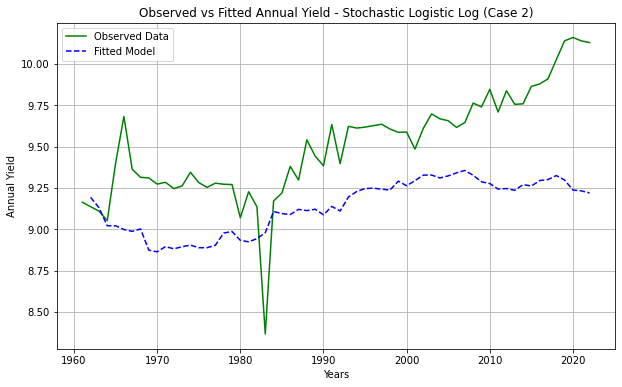

In [36]:
# Predicted temperature values in original scale
Y_predd = X @ C_hat
Predictedd_data = np.cumsum(Y_predd) + data[0]

# Plot the observed data and fitted model
plt.figure(figsize=(10, 6))
plt.plot(years, data, label='Observed Data', color='green')
plt.plot(years[1:], Predictedd_data, label='Fitted Model', color='blue', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Annual Yield')
plt.title('Observed vs Fitted Annual Yield - Stochastic Logistic Log (Case 2)')
plt.legend()
plt.grid(True)
plt.savefig('ACTUAL_OBSERVATIONS_AGAINST_FITTED YIELD_CASE_2.png', facecolor='w')
#plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE STOCHASTIC CROP YIELD MODEL AFTER INCORPORATING PRECIPITATION - CASE 3

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
np.random.seed(12)

## ESTIMATION OF PARAMETERS FOR THE CROP YIELD MODEL 

In [38]:
#Precipitation data
rr=pd.read_csv('observed-annual-precipitation-of-ghana-for-1901-2022.csv')
data_inn = np.array(rr['Annual Mean'])
data_precip = data_inn[-62:]
yrs = np.array(rr['Category'])
years = yrs[-62:]

# Log transformation
def log_transform(data_precip):
    # Adding 1 to avoid log(0) if there are zero values
    R = np.log(data_precip + 1)
    return R

R = log_transform(data_precip)

#Crop Yield data
pp=pd.read_csv('crop yield.csv')
data_crop = np.array(pp['Value'])
years = np.array(pp['Year'])

# Log transformation
def log_transform(data_crop):
    # Adding 1 to avoid log(0) if there are zero values
    data = np.log(data_crop + 1)
    return data

data = log_transform(data_crop)

# Step 1: Computation of Y and X
def compute_Y_X(data, R, delta_t, K):
    n = len(data)
    if n <= 1:
        raise ValueError("Data length must be greater than 1")

    Y = np.zeros(n - 1)
    X = np.zeros((n - 1, 2))
    
    for i in range(n - 1):
        sqrt_R_i = np.sqrt(R[i])
        Y[i] = (data[i + 1] - data[i]) / sqrt_R_i
        X[i, 0] = (1 - np.exp(data[i]) / K) * (delta_t / sqrt_R_i)  
        X[i, 1] = (delta_t / sqrt_R_i)                            
    
    return Y, X

# Step 2: Computation of C_hat
def compute_C_hat(Y, X, lambda_reg=1e-5):
    n, p = X.shape
    I = np.eye(p)
    X_transpose_X_reg = X.T @ X + lambda_reg * I
    X_transpose_X_inv = np.linalg.inv(X_transpose_X_reg)
    C_hat = X_transpose_X_inv @ X.T @ Y
    return C_hat

# Step 3: Computation of Parameters
def compute_parameters(data, R, delta_t, K, lambda_reg=1e-5):
    Y, X = compute_Y_X(data, R, delta_t, K)
    C_hat = compute_C_hat(Y, X, lambda_reg)
    
    r = C_hat[0]
    sigma = -C_hat[1]
    sigma = np.abs(sigma)
    
    # Predicted Model Y
    Y_preddd = X @ C_hat
    residuals = Y - Y_preddd
    
    # Calculation of Mean Squared Error (MSE)
    summ_sq_r = np.sum(residuals ** 2)
    total_summ_sq = np.sum((Y - np.mean(Y)) ** 2)
    mse = summ_sq_r / len(Y)
    
    print(f'Sum of Squared Errors: {summ_sq_r}')
    print(f'Total Sum of Squares: {total_summ_sq}')
    print(f'MSE: {round(mse * 100, 4)}%')
    
    # Estimate sigma_T from residuals
    sigma_R = np.sqrt(np.var(residuals) / delta_t)
    
    return r, sigma, sigma_R

delta_t = 1  # Time step
K = max(data)  # The carrying capacity


# Compute parameters
r, sigma, sigma_R = compute_parameters(data, R, delta_t, K)
print(f'My Estimated Params are: [r: {r}, sigma: {sigma}, sigma_R: {sigma_R}]')

Sum of Squared Errors: 0.2861154102074147
Total Sum of Squares: 0.2936348202728435
MSE: 0.469%
My Estimated Params are: [r: 6.905111233245001e-05, sigma: 0.11145631789946434, sigma_R: 0.06848646965721494]


In [39]:
data

array([ 9.16293425,  9.13604777,  9.10941445,  9.05228207,  9.3978982 ,
        9.68203008,  9.36228863,  9.31379908,  9.3100047 ,  9.27275163,
        9.28349789,  9.24561099,  9.26160367,  9.34417172,  9.28191657,
        9.25330407,  9.27837278,  9.27190573,  9.27011758,  9.06912237,
        9.22641055,  9.1352935 ,  8.36660283,  9.17097565,  9.21900275,
        9.37974554,  9.29725174,  9.54021949,  9.44232473,  9.38345299,
        9.63305583,  9.39607277,  9.62198634,  9.61139577,  9.6172045 ,
        9.6260198 ,  9.63469266,  9.60582248,  9.58589595,  9.58733742,
        9.48425308,  9.6091836 ,  9.69726257,  9.66744871,  9.65592323,
        9.61547209,  9.64458728,  9.76261499,  9.73920236,  9.84559357,
        9.70862772,  9.83697375,  9.75504555,  9.75799925,  9.86365465,
        9.87822103,  9.90912165, 10.02526261, 10.13911288, 10.15925317,
       10.1385992 , 10.12842949])

## PLOTTING THE ACTUAL OBSERVATIONS AGAINST FITTED YIELD - CASE 3

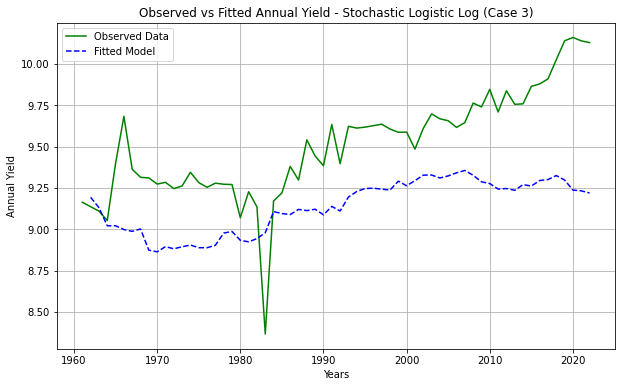

In [40]:
# Predicted temperature values in original scale
Y_preddd = X @ C_hat
Predicteddd_data = np.cumsum(Y_preddd) + data[0]

# Plot the observed data and fitted model
plt.figure(figsize=(10, 6))
plt.plot(years, data, label='Observed Data', color='green')
plt.plot(years[1:], Predicteddd_data, label='Fitted Model', color='blue', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Annual Yield')
plt.title('Observed vs Fitted Annual Yield - Stochastic Logistic Log (Case 3)')
plt.legend()
plt.grid(True)
plt.savefig('ACTUAL_OBSERVATIONS_AGAINST_FITTED YIELD_CASE_3.png', facecolor='w')
#plt.show()

# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE STOCHASTIC CROP YIELD MODEL AFTER INCORPORATING THE TWO WEATHER FACTORS - CASE 4

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(12)

# Load data
tt = pd.read_excel('my_research_temp_data.xlsx')
rr = pd.read_csv('observed-annual-precipitation-of-ghana-for-1901-2022.csv')
pp = pd.read_csv('crop yield.csv')
yrs = np.array(rr['Category'])
years = yrs[-62:]
years = np.array(tt['Category'])
years = np.array(pp['Year'])

# Extract necessary data
T = np.array(tt['Annual Mean'][-62:])
R = np.log(np.array(rr['Annual Mean'][-62:]) + 1)
Yield = np.log(np.array(pp['Value'][-62:]) + 1)
Z = np.log(Yield)

# Compute K as the maximum value of Yield
K = np.max(Yield)

# Compute differences
Delta_Z = np.diff(Z)
Delta_t = np.diff(np.arange(62))

# Prepare design matrix
X1 = np.exp(Z[:-1])
X2 = np.sqrt(T[:-1])
X3 = np.sqrt(R[:-1])

# Design matrix
X = np.column_stack((np.ones(len(Delta_Z)), X1, X2, X3))

# Fit the linear model
model = LinearRegression()
model.fit(X, Delta_Z)

# Estimated coefficients
beta_hat = model.coef_
beta_0_hat = model.intercept_

# Extract parameters
Delta_t_mean = Delta_t.mean()  # Should be 1 in this case since it's the difference between consecutive integers

r_est = -K * beta_hat[1] / Delta_t_mean
sigma_est = - (K * beta_hat[1] + beta_0_hat) / Delta_t_mean
sigma_T_est = beta_hat[2] / np.sqrt(Delta_t_mean)
sigma_R_est = np.abs(beta_hat[3] / np.sqrt(Delta_t_mean))

# Calculate the fitted Delta_Z values
Delta_Z_fitted = model.predict(X)

# Reconstruct the fitted Z values
Z_fitted = [Z[0]]  # Start with the initial Z value
for delta_z in Delta_Z_fitted:
    Z_fitted.append(Z_fitted[-1] + delta_z)
Z_fitted = np.array(Z_fitted)

# Calculate mean squared error
mse = np.mean((Z[1:] - Z_fitted[1:]) ** 2)
mse_percentage = round(mse * 100, 4)

# Print estimated parameters and MSE
print("Estimated Parameters:")
print(f"K = {K}")
print(f"r = {r_est}")
print(f"sigma = {sigma_est}")
print(f"sigma_T = {sigma_T_est}")
print(f"sigma_R = {sigma_R_est}")
print(f"Mean Squared Error: {mse_percentage}%")

Estimated Parameters:
K = 10.159253170667593
r = 0.2942515550681651
sigma = 0.6070772228951385
sigma_T = 0.1897768330613766
sigma_R = 0.1516756748031515
Mean Squared Error: 0.2633%


## PLOTTING THE ACTUAL OBSERVATIONS AGAINST FITTED YIELD - CASE 4

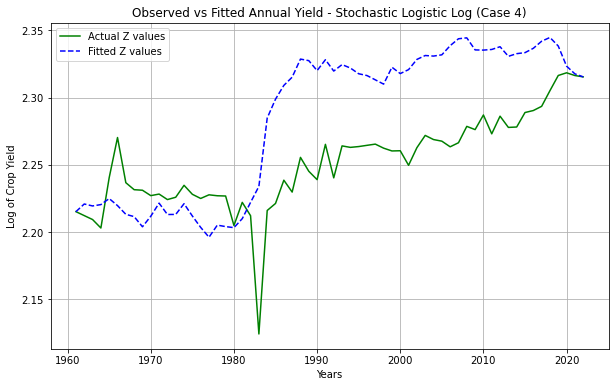

In [42]:
# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(years, Z, label='Actual Z values', color= 'green')
plt.plot(years, Z_fitted, label='Fitted Z values', linestyle='--', color='blue')
plt.xlabel('Years')
plt.ylabel('Log of Crop Yield')
plt.title('Observed vs Fitted Annual Yield - Stochastic Logistic Log (Case 4)')
plt.legend()
plt.grid(True)
plt.savefig('ACTUAL_OBSERVATIONS_AGAINST_FITTED YIELD_CASE_4.png', facecolor='w')
#plt.show()


## PLOTTING THE ACTUAL MAIZE YIELD DATA FOR VISUALISATION

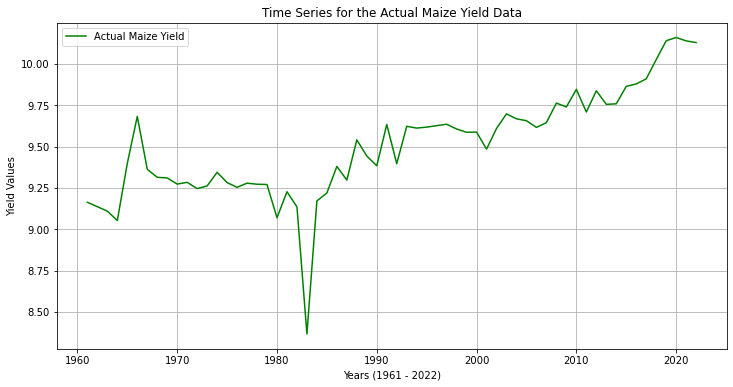

In [43]:
assert len(years) == len(data)
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Actual Maize Yield', color='green')
plt.xlabel('Years (1961 - 2022)')
plt.ylabel('Yield Values')
plt.legend()
plt.grid(True)
plt.title('Time Series for the Actual Maize Yield Data')
plt.savefig('TIME_SERIES_MAIZE_YIELD.png', facecolor='w')
#plt.show()

## HISTOGRAM FOR VISUALISATION OF THE ACTUAL YIELD DATA 

Skewness = -0.30474234838995035


Text(0.7, 0.9, 'Skewness = -0.3047')

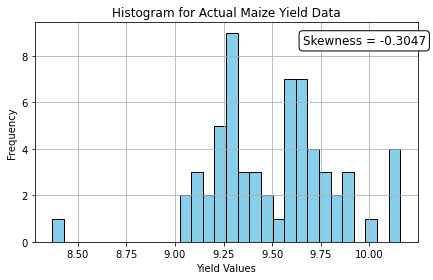

In [44]:
# plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, edgecolor='black',color='skyblue')
plt.xlabel('Yield Values')
plt.ylabel('Frequency')
plt.title('Histogram for Actual Maize Yield Data')
plt.grid(True)
plt.tight_layout()

skewness = stats.skew(data)
print('Skewness =', skewness)

plt.annotate(f'Skewness = {skewness:.4f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#plt.savefig('CIR_HISTOGRAM_ACTUAL_MAIZE_YIELD.png', facecolor='w')
#plt.show()

# SIMULATION FOR THE DETERMINISTIC CROP YIELD - CASE 1 

Sigma values for sensitivity analysis: [0.05297401 0.07946102 0.10594802 0.13243503 0.15892203]
          sigma  Mean_Yield
count  5.000000    5.000000
mean   0.105948    1.695051
std    0.041880    0.708839
min    0.052974    1.022424
25%    0.079461    1.210909
50%    0.105948    1.492342
75%    0.132435    1.951815
max    0.158922    2.797762
For low sigma scenario:
      sigma  Mean_Yield
0  0.052974    2.797762
For high sigma scenario:
      sigma  Mean_Yield
4  0.158922    1.022424


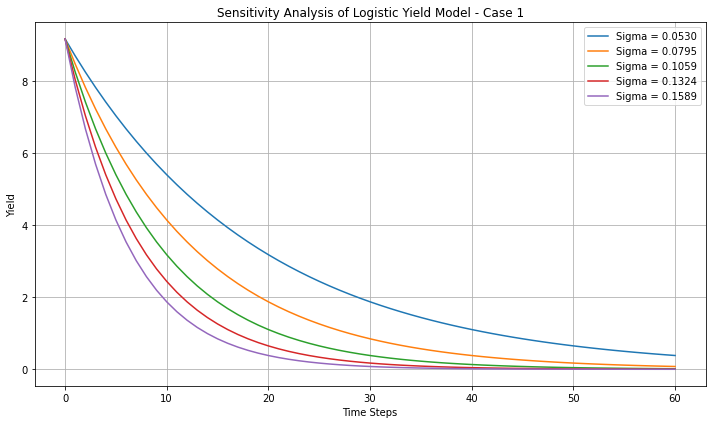

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12)

# Function to simulate the logistic log yield model
def simulate_logistic_log_yield(r, sigma, K, Z_0, delta_t, numb_steps):
    n_steps = int(numb_steps / delta_t)
    Z = np.zeros(n_steps)
    Z[0] = Z_0
    
    for i in range(1, n_steps):
        # Deterministic model 
        Z[i] = Z[i-1] + (r * (1 - np.exp(Z[i-1]) / K)) * delta_t - sigma * delta_t
        
    return Z

# Parameters
r = 6.558680203841964e-05  # Intrinsic Growth Rate
K = 10.159253170667593  # Carrying Capacity
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)
delta_t = 1  # Time step
numb_steps = 61  # Total time for the simulation

# Specific Sigma Value
specific_sigma = 0.10594802301101927

# Calculating 25% and 50% of specific_sigma
deviation_25_percent = 0.25 * specific_sigma
deviation_50_percent = 0.50 * specific_sigma

# Calculating the interval bounds
lower_bound_25 = specific_sigma - deviation_25_percent
upper_bound_25 = specific_sigma + deviation_25_percent

lower_bound_50 = specific_sigma - deviation_50_percent
upper_bound_50 = specific_sigma + deviation_50_percent

# Defining the range of sigma values for sensitivity analysis
sigma_values = np.array([
    lower_bound_50,  # 50% lower bound
    lower_bound_25,  # 25% lower bound
    specific_sigma,  # specific sigma value
    upper_bound_25,  # 25% upper bound
    upper_bound_50   # 50% upper bound
])
print("Sigma values for sensitivity analysis:", sigma_values)

# Storage for results
all_Z = []
mean_Z = []

# Running simulations for each value of sigma
for sigma in sigma_values:
    Z = simulate_logistic_log_yield(r, sigma, K, Z_0, delta_t, numb_steps)
    all_Z.append(Z)
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield
    

    # Plotting Maize Yield
plt.figure(figsize=(10, 6))
for idx, Z in enumerate(all_Z):
    plt.plot(np.exp(Z), label=f'Sigma = {sigma_values[idx]:.4f}')
plt.xlabel('Time Steps')
plt.ylabel('Yield')
plt.title('Sensitivity Analysis of Logistic Yield Model - Case 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_DETERMINISTIC_YIELD.png', facecolor='w')
#plt.show()

# Interpretation
low_sigma = sigma_values[0]
high_sigma = sigma_values[-1]

# Create a DataFrame for easy analysis
results = pd.DataFrame({
    'sigma': sigma_values,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results.describe())

low_sigma_result = results[results['sigma'] == low_sigma]
high_sigma_result = results[results['sigma'] == high_sigma]

print("For low sigma scenario:")
print(low_sigma_result)
print("For high sigma scenario:")
print(high_sigma_result)

# SIMULATION FOR THE STOCHASTIC CROP YIELD AGAINST TEMPERATURE - CASE 2

Sigma_T values for sensitivity analysis: [0.01727759 0.02591638 0.03455518 0.04319397 0.05183277]
        sigma_T  Mean_Temperature  Mean_Yield
count  5.000000          5.000000    5.000000
mean   0.034555         27.426804    1.220908
std    0.013659          0.183663    0.314008
min    0.017278         27.244378    0.855355
25%    0.025916         27.320869    1.058339
50%    0.034555         27.334485    1.205614
75%    0.043194         27.548425    1.284693
max    0.051833         27.685864    1.700537
For low sigma_T scenario:
    sigma_T  Mean_Temperature  Mean_Yield
0  0.017278         27.334485    1.205614
For high sigma_T scenario:
    sigma_T  Mean_Temperature  Mean_Yield
4  0.051833         27.685864    1.058339


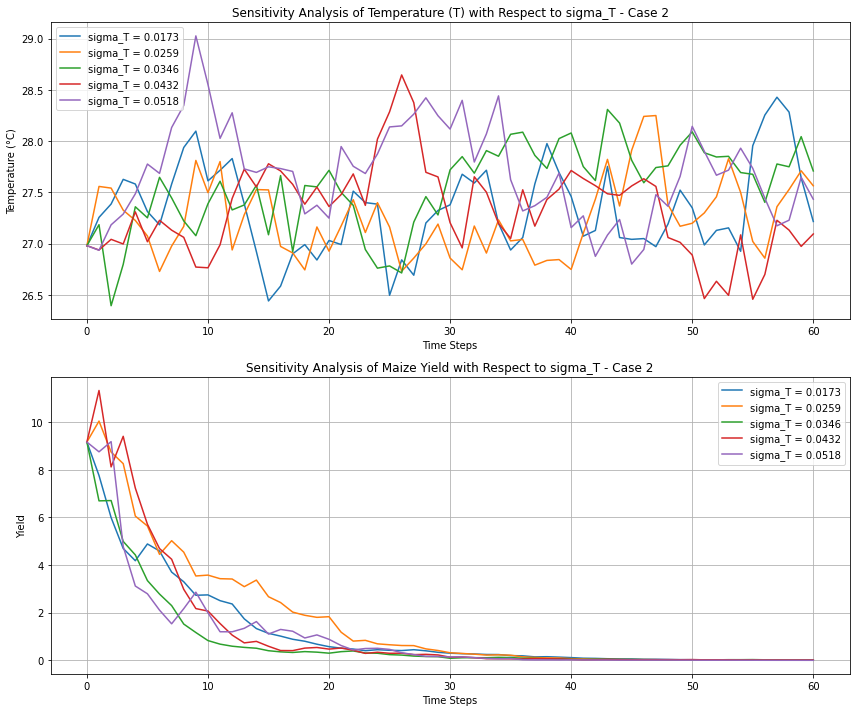

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12)

def simulate_T_Z(T_0, Z_0, delta_t, alpha, beta, bar_T, r, sigma, sigma_T, K, num_steps):
    T = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    T[0] = T_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(np.abs(T[i]))  
     
        # Simulating for Temperature (T)
        T_det = alpha * (bar_T - T[i]) * delta_t
        T_stoch = beta * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        T[i + 1] = T[i] + T_det + T_stoch

        # Simulate for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = (sigma_T * sqrt_T_i) * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return T, Z

# Parameters
delta_t = 1
alpha = 0.2886376653569112  # Rate of reversion to mean temperature
beta = 0.05536454156752402  # Volatility in temperature
bar_T = 27.463908417676507  # Mean temperature
r = 6.540839871790122e-05  # Growth rate
sigma = 0.10508962980192249  # Parameter sigma
K = 10.159253170667593
T_0 = 26.98  # Initial temperature
initial_yield = 9.16293425
Z_0 = np.log(initial_yield)
num_steps = 61  # Number of time steps

# Specific Sigma Value
specific_sigma_T = 0.03455517884989635

# Calculating 25% and 50% of specific_sigma
deviation_25_percent = 0.25 * specific_sigma_T
deviation_50_percent = 0.50 * specific_sigma_T

# Calculating the interval bounds
lower_bound_25 = specific_sigma_T - deviation_25_percent
upper_bound_25 = specific_sigma_T + deviation_25_percent

lower_bound_50 = specific_sigma_T - deviation_50_percent
upper_bound_50 = specific_sigma_T + deviation_50_percent

# Defining the range of sigma_T values for sensitivity analysis
sigma_T_values = np.array([
    lower_bound_50,  # 50% lower bound
    lower_bound_25,  # 25% lower bound
    specific_sigma_T,  # Specific sigma value
    upper_bound_25,  # 25% upper bound
    upper_bound_50   # 50% upper bound
])

print("Sigma_T values for sensitivity analysis:", sigma_T_values)

# Storage for results
all_T = []
all_Z = []
mean_T = []
mean_Z = []

# Run simulations for each value of sigma_T
for sigma_T in sigma_T_values:
    T, Z = simulate_T_Z(T_0, Z_0, delta_t, alpha, beta, bar_T, r, sigma, sigma_T, K, num_steps)
    all_T.append(T)
    all_Z.append(Z)
    mean_T.append(np.mean(T))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield                                              

time = np.arange(num_steps) * delta_t


# Create a single figure with two subplots
plt.figure(figsize=(12, 10))

# Plot for Temperature (T)
plt.subplot(2, 1, 1)
for i, sigma_T in enumerate(sigma_T_values):
    plt.plot(time, all_T[i], label=f'sigma_T = {sigma_T:.4f}')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Sensitivity Analysis of Temperature (T) with Respect to sigma_T - Case 2')
plt.grid(True)
plt.legend()

# Plot for Maize Yield (converted from log yield)
plt.subplot(2, 1, 2)
for i, sigma_T in enumerate(sigma_T_values):
    plt.plot(time, np.exp(all_Z[i]), label=f'sigma_T = {sigma_T:.4f}')  # Convert log yield to actual yield
plt.xlabel('Time Steps')
plt.ylabel('Yield')
plt.title('Sensitivity Analysis of Maize Yield with Respect to sigma_T - Case 2')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_TEMP_AND_YIELD.png', facecolor='w')
#plt.show()

# Interpretation
low_sigma_T = sigma_T_values[0]
high_sigma_T = sigma_T_values[-1]

# Create a DataFrame for easy analysis
results = pd.DataFrame({
    'sigma_T': sigma_T_values,
    'Mean_Temperature': mean_T,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results.describe())

low_sigma_T_result = results[results['sigma_T'] == low_sigma_T]
high_sigma_T_result = results[results['sigma_T'] == high_sigma_T]

print("For low sigma_T scenario:")
print(low_sigma_T_result)
print("For high sigma_T scenario:")
print(high_sigma_T_result)

# SIMULATION FOR THE STOCHASTIC CROP YIELD AGAINST PRECIPITATION CASE - 3

Sigma values for sensitivity analysis: [0.03424323 0.05136485 0.06848647 0.08560809 0.1027297 ]
        sigma_R  Mean_Precipitation  Mean_Yield
count  5.000000            5.000000    5.000000
mean   0.068486            7.100897    1.165342
std    0.027072            0.022643    0.295976
min    0.034243            7.079562    0.820987
25%    0.051365            7.086437    1.010004
50%    0.068486            7.089138    1.143182
75%    0.085608            7.117003    1.237803
max    0.102730            7.132344    1.614735
For low sigma_R scenario:
    sigma_R  Mean_Precipitation  Mean_Yield
0  0.034243            7.089138    1.143182
For high sigma_R scenario:
   sigma_R  Mean_Precipitation  Mean_Yield
4  0.10273            7.132344    1.010004


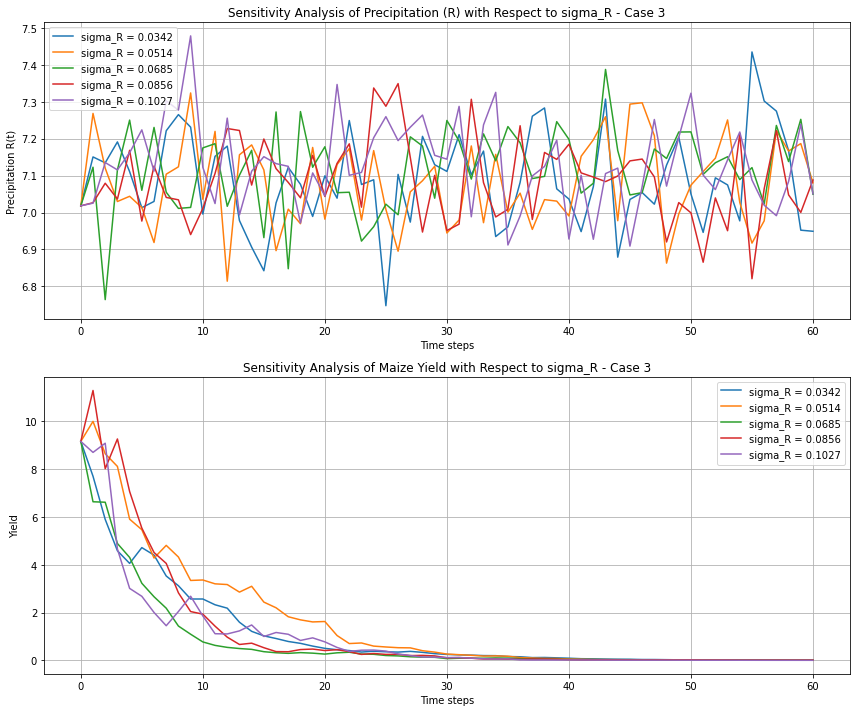

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12)

def simulate_R_Z(R_0, Z_0, delta_t, gamma, delta_hat, Rbar, r, sigma, sigma_R, K, num_steps):
    R = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    R[0] = R_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_R_i = np.sqrt(np.abs(R[i]))  
        
        # Simulating for Precipitation (R)
        R_det = gamma * (Rbar - R[i]) * delta_t
        R_stoch = delta_hat * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        R[i + 1] = R[i] + R_det + R_stoch
        
        # Simulating for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = sigma_R * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return R, Z

# Parameters 
delta_t = 1  # Time step
gamma = 0.9267227175571794  # Rate of reversion to mean precipitation
delta_hat = 0.042356808514400435  # Volatility in precipitation
Rbar = 7.103812260785402  # Mean precipitation
r = 6.905111233245001e-05  # Growth rate
sigma = 0.11145631789946434  # Parameter sigma
K = 10.159253170667593  # Carrying capacity
R_0 = 7.01830332  # Initial precipitation
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)  
num_steps = 61  # Number of time steps

# Sensitivity analysis for sigma_R
# Specific Sigma Value
specific_sigma_R = 0.06848646965721494

# Calculating 25% and 50% of specific_sigma
deviation_25_percent = 0.25 * specific_sigma_R
deviation_50_percent = 0.50 * specific_sigma_R

# Calculating the interval bounds
lower_bound_25 = specific_sigma_R - deviation_25_percent
upper_bound_25 = specific_sigma_R + deviation_25_percent

lower_bound_50 = specific_sigma_R - deviation_50_percent
upper_bound_50 = specific_sigma_R + deviation_50_percent

# Defining the range of sigma_R values for sensitivity analysis
sigma_R_values = np.array([
    lower_bound_50,  # 50% lower bound
    lower_bound_25,  # 25% lower bound
    specific_sigma_R,  # specific sigma value
    upper_bound_25,  # 25% upper bound
    upper_bound_50   # 50% upper bound
])

print("Sigma values for sensitivity analysis:", sigma_R_values)

# Storage for results
all_R = []
all_Z = []
mean_R = []
mean_Z = []

# Run simulations for each value of sigma_R
for sigma_R in sigma_R_values:
    R, Z = simulate_R_Z(R_0, Z_0, delta_t, gamma, delta_hat, Rbar, r, sigma, sigma_R, K, num_steps)
    all_R.append(R)
    all_Z.append(Z)
    mean_R.append(np.mean(R))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield                                                

time = np.arange(num_steps) * delta_t


# Create a single figure with two subplots
plt.figure(figsize=(12, 10))

# Plot for Precipitation (R)
plt.subplot(2, 1, 1)
for i, sigma_R in enumerate(sigma_R_values):
    plt.plot(time, all_R[i], label=f'sigma_R = {sigma_R:.4f}')
plt.xlabel('Time steps')
plt.ylabel('Precipitation R(t)')
plt.title('Sensitivity Analysis of Precipitation (R) with Respect to sigma_R - Case 3')
plt.grid(True)
plt.legend()

# Plot for Maize Yield (converted from log yield)
plt.subplot(2, 1, 2)
for i, sigma_R in enumerate(sigma_R_values):
    plt.plot(time, np.exp(all_Z[i]), label=f'sigma_R = {sigma_R:.4f}')  # Convert log yield to actual yield
plt.xlabel('Time steps')
plt.ylabel('Yield')
plt.title('Sensitivity Analysis of Maize Yield with Respect to sigma_R - Case 3')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_PRECIP_ACTUAL_YIELD.png', facecolor='w')
#plt.show()

# Interpretation
low_sigma_R = sigma_R_values[0]
high_sigma_R = sigma_R_values[-1]

# Create a DataFrame for easy analysis
results = pd.DataFrame({
    'sigma_R': sigma_R_values,
    'Mean_Precipitation': mean_R,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results.describe())

low_sigma_R_result = results[results['sigma_R'] == low_sigma_R]
high_sigma_R_result = results[results['sigma_R'] == high_sigma_R]

print("For low sigma_R scenario:")
print(low_sigma_R_result)
print("For high sigma_R scenario:")
print(high_sigma_R_result)

In [48]:
np.mean(T)

27.685863830990982

# SIMULATION FOR THE STOCHASTIC CROP YIELD AGAINST TEMPERATURE AND PRECIPITATION (CASE - 4)     -     VARYING ONLY SIGMA

Sigma_ values for sensitivity analysis: [0.3035386114475693, 0.4553079171713539, 0.6070772228951385, 0.7588465286189232, 0.9106158343427078]


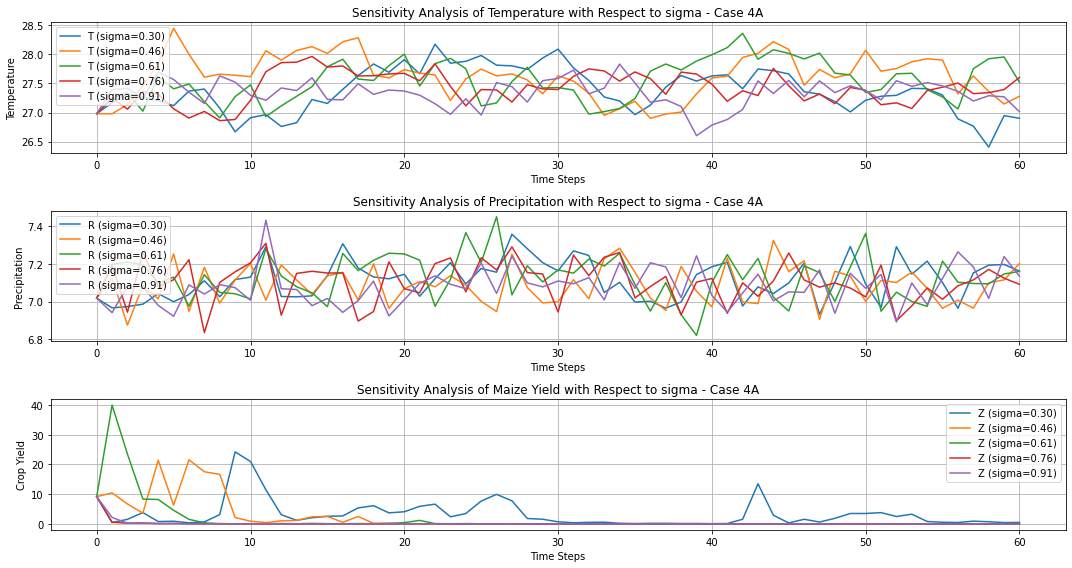

          sigma  Mean_Temperature  Mean_Precipitation  Mean_Yield
count  5.000000          5.000000            5.000000    5.000000
mean   0.607077         27.457558            7.101953    1.477559
std    0.239968          0.121658            0.018750    1.331686
min    0.303539         27.329145            7.079974    0.174069
25%    0.455308         27.373375            7.086202    0.196924
50%    0.607077         27.419679            7.104832    1.613993
75%    0.758847         27.545232            7.113922    2.093029
max    0.910616         27.620359            7.124834    3.309777

For low sigma scenario:
      sigma  Mean_Temperature  Mean_Precipitation  Mean_Yield
0  0.303539         27.373375            7.113922    3.309777

For high sigma scenario:
      sigma  Mean_Temperature  Mean_Precipitation  Mean_Yield
4  0.910616         27.329145            7.079974    0.196924


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract necessary data
T = np.array(tt['Annual Mean'][-62:])
R = np.log(np.array(rr['Annual Mean'][-62:]) + 1)
Y = np.log(np.array(pp['Value'][-62:]) + 1)  # Corrected line
Z = np.log(Y)  # Corrected line

np.random.seed(12)

def simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R, K, num_steps):
    T = np.zeros(num_steps)
    R = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    T[0] = T_0
    R[0] = R_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(np.abs(T[i])) 
        sqrt_R_i = np.sqrt(np.abs(R[i])) 
        
        # Simulating for Temperature (T)
        T_det = alpha * (Tbar - T[i]) * delta_t
        T_stoch = delta_hat * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        T[i + 1] = T[i] + T_det + T_stoch
        
        # Simulating for Precipitation (R)
        R_det = gamma * (Rbar - R[i]) * delta_t
        R_stoch = delta_hat * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        R[i + 1] = R[i] + R_det + R_stoch

        # Simulating for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = sigma_T * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1) + sigma_R * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return T, R, Z

# Parameters 
delta_t = 1  # Time step
gamma = 0.9267227175571794  # Rate of reversion to mean precipitation
delta_hat = 0.042356808514400435  # Volatility in precipitation
alpha = 0.2886376653569112  # Rate of reversion to mean temperature
Tbar = 27.463908417676507  # Mean temperature
Rbar = 7.103812260785402  # Mean precipitation
r = 0.2942515550681651  # Growth rate
sigma = 0.6070772228951385  # Parameter sigma
sigma_T = 0.1897768330613766
sigma_R = 0.1516756748031515
K = 10.159253170667593  # Carrying capacity
T_0 = T[0]
R_0 = 7.01830332  # Initial precipitation
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)  
num_steps = 61  # Number of time steps

# Run the simulation with given parameters
T, R, Z = simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R, K, num_steps)

# Plot the results
time = np.arange(num_steps) * delta_t

# plt.figure(figsize=(12, 6))
# plt.subplot(311)
# plt.plot(time, T, label='Temperature (T)')
# plt.xlabel('Time')
# plt.ylabel('Temperature')
# plt.legend()

# plt.subplot(312)
# plt.plot(time, R, label='Precipitation (R)')
# plt.xlabel('Time')
# plt.ylabel('Precipitation')
# plt.legend()

# plt.subplot(313)
# plt.plot(time, np.exp(Z), label='Crop Yield (exp(Z))')
# plt.xlabel('Time')
# plt.ylabel('Crop Yield')
# plt.legend()

# plt.tight_layout()
# plt.show()

# Sensitivity analysis: Varying sigma by ±25% and ±50%
deviation_25_percent = 0.25 * sigma
deviation_50_percent = 0.50 * sigma

# Define the range of sigma values for sensitivity analysis
sigma_values = [sigma - deviation_50_percent, sigma - deviation_25_percent, sigma, sigma + deviation_25_percent, sigma + deviation_50_percent]
print("Sigma_ values for sensitivity analysis:", sigma_values)

# Storage for results
all_T = []
all_R = []
all_Z = []
mean_T = []
mean_R = []
mean_Z = []

# Run simulations for each sigma value
for sigma in sigma_values:
    T, R, Z = simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R, K, num_steps)
    all_T.append(T)
    all_R.append(R)
    all_Z.append(Z)
    mean_T.append(np.mean(T))
    mean_R.append(np.mean(R))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield

# Plot the sensitivity analysis results
plt.figure(figsize=(15, 8))

for i in range(len(sigma_values)):
    plt.subplot(311)
    plt.plot(time, all_T[i], label=f'T (sigma={sigma_values[i]:.2f})')
    plt.xlabel('Time Steps')
    plt.ylabel('Temperature')
    plt.title('Sensitivity Analysis of Temperature with Respect to sigma - Case 4A')
    plt.grid(True)
    plt.legend()
    

for i in range(len(sigma_values)):
    plt.subplot(312)
    plt.plot(time, all_R[i], label=f'R (sigma={sigma_values[i]:.2f})')
    plt.xlabel('Time Steps')
    plt.ylabel('Precipitation')
    plt.title('Sensitivity Analysis of Precipitation with Respect to sigma - Case 4A')
    plt.grid(True)
    plt.legend()

for i in range(len(sigma_values)):
    plt.subplot(313)
    plt.plot(time, np.exp(all_Z[i]), label=f'Z (sigma={sigma_values[i]:.2f})')
    plt.xlabel('Time Steps')
    plt.ylabel('Crop Yield')
    plt.title('Sensitivity Analysis of Maize Yield with Respect to sigma - Case 4A')

plt.subplot(311)
plt.legend()
plt.subplot(312)
plt.legend()
plt.subplot(313)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_CASE_4A_YIELD.png', facecolor='w')
plt.show()

# Define low and high sigma values
low_sigma = sigma_values[0]
high_sigma = sigma_values[-1]

# Create a DataFrame for easy analysis
results_sigma = pd.DataFrame({
    'sigma': sigma_values,
    'Mean_Temperature': mean_T,
    'Mean_Precipitation': mean_R,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print(results_sigma.describe())

# Filter results for low and high sigma scenarios
low_sigma_result = results_sigma[results_sigma['sigma'] == low_sigma]
high_sigma_result = results_sigma[results_sigma['sigma'] == high_sigma]

print("\nFor low sigma scenario:")
print(low_sigma_result)
print("\nFor high sigma scenario:")
print(high_sigma_result)

# SIMULATION FOR THE STOCHASTIC CROP YIELD AGAINST TEMPERATURE AND PRECIPITATION (CASE - 4)     -     VARYING ONLY SIGMA_T

Sigma_T values for sensitivity analysis: [0.0948884165306883, 0.14233262479603245, 0.1897768330613766, 0.23722104132672076, 0.2846652495920649]


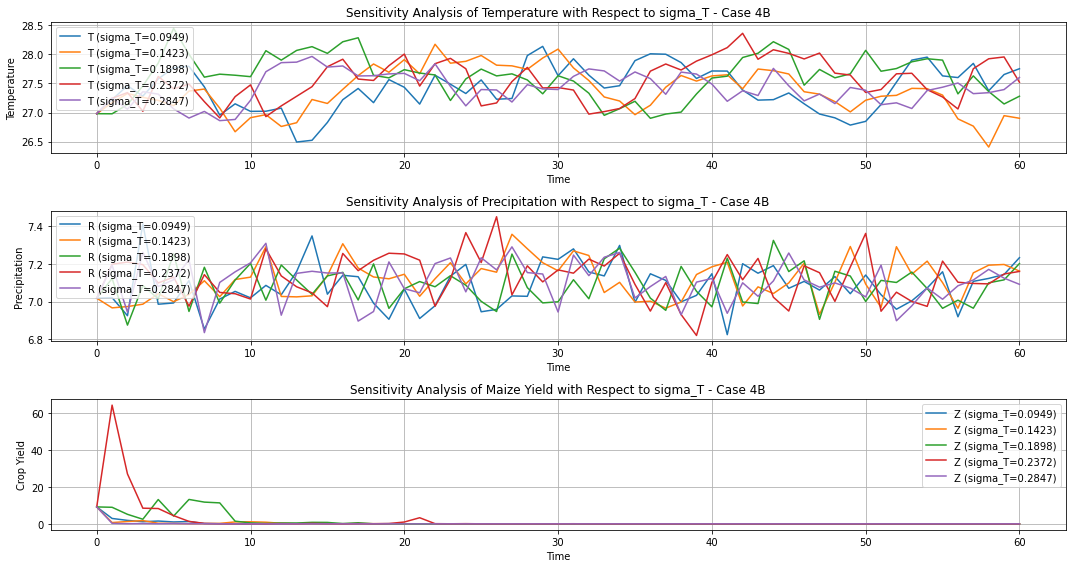


Summary Statistics for Sensitivity Analysis:
        sigma_T  Mean_Temperature  Mean_Precipitation  Mean_Yield
count  5.000000          5.000000            5.000000    5.000000
mean   0.189777         27.474191            7.102143    0.861314
std    0.075016          0.104135            0.018475    0.855853
min    0.094888         27.373375            7.080923    0.165815
25%    0.142333         27.412309            7.086202    0.300679
50%    0.189777         27.419679            7.104832    0.332315
75%    0.237221         27.545232            7.113922    1.394216
max    0.284665         27.620359            7.124834    2.113546

For low sigma_T scenario:
    sigma_T  Mean_Temperature  Mean_Precipitation  Mean_Yield
0  0.094888         27.412309            7.080923    0.332315

For high sigma_T scenario:
    sigma_T  Mean_Temperature  Mean_Precipitation  Mean_Yield
4  0.284665         27.419679            7.104832    0.165815


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract necessary data
T = np.array(tt['Annual Mean'][-62:])
R = np.log(np.array(rr['Annual Mean'][-62:]) + 1)
Y = np.log(np.array(pp['Value'][-62:]) + 1)  # Corrected line
Z = np.log(Y)  # Corrected line

np.random.seed(12)

def simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R, K, num_steps):
    T = np.zeros(num_steps)
    R = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    T[0] = T_0
    R[0] = R_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(np.abs(T[i])) 
        sqrt_R_i = np.sqrt(np.abs(R[i])) 
        
        # Simulating for Temperature (T)
        T_det = alpha * (Tbar - T[i]) * delta_t
        T_stoch = delta_hat * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        T[i + 1] = T[i] + T_det + T_stoch
        
        # Simulating for Precipitation (R)
        R_det = gamma * (Rbar - R[i]) * delta_t
        R_stoch = delta_hat * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        R[i + 1] = R[i] + R_det + R_stoch

        # Simulating for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = sigma_T * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1) + sigma_R * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return T, R, Z

# Parameters 
delta_t = 1  # Time step
gamma = 0.9267227175571794  # Rate of reversion to mean precipitation
delta_hat = 0.042356808514400435  # Volatility in precipitation
alpha = 0.2886376653569112  # Rate of reversion to mean temperature
Tbar = 27.463908417676507  # Mean temperature
Rbar = 7.103812260785402  # Mean precipitation
r = 0.2942515550681651  # Growth rate
sigma = 0.6070772228951385  # Parameter sigma
sigma_T_base = 0.1897768330613766  # Base sigma_T
sigma_R = 0.1516756748031515  # Fixed sigma_R
K = 10.159253170667593  # Carrying capacity
T_0 = T[0]
R_0 = 7.01830332  # Initial precipitation
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)  
num_steps = 61  # Number of time steps

# Sensitivity analysis: Varying sigma_T by ±25% and ±50%
deviation_25_percent = 0.25 * sigma_T_base
deviation_50_percent = 0.50 * sigma_T_base

# Define the range of sigma_T values for sensitivity analysis
sigma_T_values = [sigma_T_base - deviation_50_percent, sigma_T_base - deviation_25_percent, sigma_T_base, sigma_T_base + deviation_25_percent, sigma_T_base + deviation_50_percent]
print("Sigma_T values for sensitivity analysis:", sigma_T_values)

# Storage for results
all_T = []
all_R = []
all_Z = []
mean_T = []
mean_R = []
mean_Z = []

# Run simulations for each sigma_T value
for sigma_T_val in sigma_T_values:
    T, R, Z = simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T_val, sigma_R, K, num_steps)
    all_T.append(T)
    all_R.append(R)
    all_Z.append(Z)
    mean_T.append(np.mean(T))
    mean_R.append(np.mean(R))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield

# Plot the sensitivity analysis results
time = np.arange(num_steps)  # Define the time axis

plt.figure(figsize=(15, 8))

for i in range(len(sigma_T_values)):
    plt.subplot(311)
    plt.plot(time, all_T[i], label=f'T (sigma_T={sigma_T_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('Sensitivity Analysis of Temperature with Respect to sigma_T - Case 4B')
    plt.grid(True)
    plt.legend()
    

for i in range(len(sigma_T_values)):
    plt.subplot(312)
    plt.plot(time, all_R[i], label=f'R (sigma_T={sigma_T_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.title('Sensitivity Analysis of Precipitation with Respect to sigma_T - Case 4B')
    plt.grid(True)
    plt.legend()
    

for i in range(len(sigma_T_values)):
    plt.subplot(313)
    plt.plot(time, np.exp(all_Z[i]), label=f'Z (sigma_T={sigma_T_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Crop Yield')
    plt.title('Sensitivity Analysis of Maize Yield with Respect to sigma_T - Case 4B')
    plt.grid(True)
    plt.legend()
    

plt.subplot(311)
plt.legend()
plt.subplot(312)
plt.legend()
plt.subplot(313)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_CASE_4B_YIELD.png', facecolor='w')
plt.show()

# Define low and high sigma_T values
low_sigma_T = min(sigma_T_values)
high_sigma_T = max(sigma_T_values)

# Create a DataFrame for easy analysis
results_sigma_T = pd.DataFrame({
    'sigma_T': sigma_T_values,
    'Mean_Temperature': mean_T,
    'Mean_Precipitation': mean_R,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print("\nSummary Statistics for Sensitivity Analysis:")
print(results_sigma_T.describe())

# Filter results for low and high sigma_T scenarios
low_sigma_T_result = results_sigma_T[results_sigma_T['sigma_T'] == low_sigma_T]
high_sigma_T_result = results_sigma_T[results_sigma_T['sigma_T'] == high_sigma_T]

print("\nFor low sigma_T scenario:")
print(low_sigma_T_result)
print("\nFor high sigma_T scenario:")
print(high_sigma_T_result)

# SIMULATION FOR THE STOCHASTIC CROP YIELD AGAINST TEMPERATURE AND PRECIPITATION (CASE - 4)     -     VARYING ONLY SIGMA_R

Sigma_R values for sensitivity analysis: [0.07583783740157575, 0.11375675610236363, 0.1516756748031515, 0.18959459350393937, 0.22751351220472726]


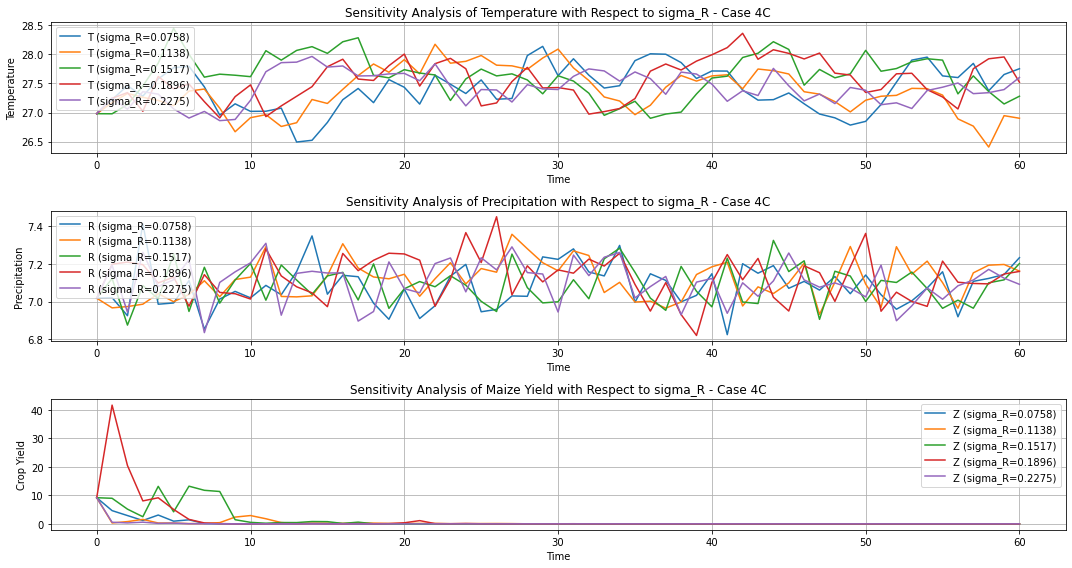


Summary Statistics for Sensitivity Analysis:
        sigma_R  Mean_Temperature  Mean_Precipitation  Mean_Yield
count  5.000000          5.000000            5.000000    5.000000
mean   0.151676         27.474191            7.102143    0.791628
std    0.059955          0.104135            0.018475    0.656635
min    0.075838         27.373375            7.080923    0.184967
25%    0.113757         27.412309            7.086202    0.375682
50%    0.151676         27.419679            7.104832    0.396531
75%    0.189595         27.545232            7.113922    1.394216
max    0.227514         27.620359            7.124834    1.606745

For low sigma_R scenario:
    sigma_R  Mean_Temperature  Mean_Precipitation  Mean_Yield
0  0.075838         27.412309            7.080923    0.396531

For high sigma_R scenario:
    sigma_R  Mean_Temperature  Mean_Precipitation  Mean_Yield
4  0.227514         27.419679            7.104832    0.184967


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract necessary data
T = np.array(tt['Annual Mean'][-62:])
R = np.log(np.array(rr['Annual Mean'][-62:]) + 1)
Y = np.log(np.array(pp['Value'][-62:]) + 1)  # Corrected line
Z = np.log(Y)  # Corrected line

np.random.seed(12)

def simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R, K, num_steps):
    T = np.zeros(num_steps)
    R = np.zeros(num_steps)
    Z = np.zeros(num_steps)
    T[0] = T_0
    R[0] = R_0
    Z[0] = Z_0
    
    for i in range(num_steps - 1):
        sqrt_T_i = np.sqrt(np.abs(T[i])) 
        sqrt_R_i = np.sqrt(np.abs(R[i])) 
        
        # Simulating for Temperature (T)
        T_det = alpha * (Tbar - T[i]) * delta_t
        T_stoch = delta_hat * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        T[i + 1] = T[i] + T_det + T_stoch
        
        # Simulating for Precipitation (R)
        R_det = gamma * (Rbar - R[i]) * delta_t
        R_stoch = delta_hat * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        R[i + 1] = R[i] + R_det + R_stoch

        # Simulating for Crop Yield (Z)
        Z_det = (r * (1 - np.exp(Z[i]) / K) - sigma) * delta_t
        Z_stoch = sigma_T * sqrt_T_i * np.sqrt(delta_t) * np.random.normal(0, 1) + sigma_R * sqrt_R_i * np.sqrt(delta_t) * np.random.normal(0, 1)
        Z[i + 1] = Z[i] + Z_det + Z_stoch
    
    return T, R, Z

# Parameters 
delta_t = 1  # Time step
gamma = 0.9267227175571794  # Rate of reversion to mean precipitation
delta_hat = 0.042356808514400435  # Volatility in precipitation
alpha = 0.2886376653569112  # Rate of reversion to mean temperature
Tbar = 27.463908417676507  # Mean temperature
Rbar = 7.103812260785402  # Mean precipitation
r = 0.2942515550681651  # Growth rate
sigma = 0.6070772228951385  # Parameter sigma
sigma_T = 0.1897768330613766  # Fixed sigma_T
sigma_R = 0.1516756748031515  # Base value of sigma_R
K = 10.159253170667593  # Carrying capacity
T_0 = T[0]
R_0 = 7.01830332  # Initial precipitation
initial_yield = 9.16293425  
Z_0 = np.log(initial_yield)  
num_steps = 61  # Number of time steps

# Sensitivity analysis: Varying sigma_R by ±25% and ±50%
deviation_25_percent = 0.25 * sigma_R
deviation_50_percent = 0.50 * sigma_R

# Define the range of sigma_R values for sensitivity analysis
sigma_R_values = [sigma_R - deviation_50_percent, sigma_R - deviation_25_percent, sigma_R, sigma_R + deviation_25_percent, sigma_R + deviation_50_percent]
print("Sigma_R values for sensitivity analysis:", sigma_R_values)

# Storage for results
all_T = []
all_R = []
all_Z = []
mean_T = []
mean_R = []
mean_Z = []

# Run simulations for each sigma_R value
for sigma_R_val in sigma_R_values:
    T, R, Z = simulate_R_Z(T_0, R_0, Z_0, delta_t, alpha, gamma, delta_hat, Tbar, Rbar, r, sigma, sigma_T, sigma_R_val, K, num_steps)
    all_T.append(T)
    all_R.append(R)
    all_Z.append(Z)
    mean_T.append(np.mean(T))
    mean_R.append(np.mean(R))
    mean_Z.append(np.mean(np.exp(Z)))  # Converting log yield back to yield

# Plot the sensitivity analysis results
plt.figure(figsize=(15, 8))

for i in range(len(sigma_R_values)):
    plt.subplot(311)
    plt.plot(time, all_T[i], label=f'T (sigma_R={sigma_R_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('Sensitivity Analysis of Temperature with Respect to sigma_R - Case 4C')
    plt.grid(True)
    plt.legend()
    

for i in range(len(sigma_R_values)):
    plt.subplot(312)
    plt.plot(time, all_R[i], label=f'R (sigma_R={sigma_R_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.title('Sensitivity Analysis of Precipitation with Respect to sigma_R - Case 4C')
    plt.grid(True)
    plt.legend()
    

for i in range(len(sigma_R_values)):
    plt.subplot(313)
    plt.plot(time, np.exp(all_Z[i]), label=f'Z (sigma_R={sigma_R_values[i]:.4f})')
    plt.xlabel('Time')
    plt.ylabel('Crop Yield')
    plt.title('Sensitivity Analysis of Maize Yield with Respect to sigma_R - Case 4C')
    plt.grid(True)
    plt.legend()
    

plt.subplot(311)
plt.legend()
plt.subplot(312)
plt.legend()
plt.subplot(313)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('SENSITIVITY_ANALYSIS_CASE_4C_YIELD.png', facecolor='w')
plt.show()

# Define low and high sigma_R values
low_sigma_R = min(sigma_R_values)
high_sigma_R = max(sigma_R_values)

# Create a DataFrame for easy analysis
results_sigma_R = pd.DataFrame({
    'sigma_R': sigma_R_values,
    'Mean_Temperature': mean_T,
    'Mean_Precipitation': mean_R,
    'Mean_Yield': mean_Z
})

# Display summary statistics
print("\nSummary Statistics for Sensitivity Analysis:")
print(results_sigma_R.describe())

# Filter results for low and high sigma_R scenarios
low_sigma_R_result = results_sigma_R[results_sigma_R['sigma_R'] == low_sigma_R]
high_sigma_R_result = results_sigma_R[results_sigma_R['sigma_R'] == high_sigma_R]

print("\nFor low sigma_R scenario:")
print(low_sigma_R_result)
print("\nFor high sigma_R scenario:")
print(high_sigma_R_result)